In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_begin, x_end, y_begin, y_end, t_begin, t_end = 0, np.pi / 4, 0, np.log(2), 0, 1
hx, hy, tau = 0.01, 0.01, 0.01

In [3]:
def read_txt_file(filename):
    with open(filename, 'r') as f:
        matrix = [np.array(list(map(float, line.split()))) for line in f]
    return np.array(matrix)

analytical_solution = read_txt_file("analytical_solution.txt").reshape(101, 79, 70)
variable_directions_method = read_txt_file("variable_directions_method.txt").reshape(101, 79, 70)
fractional_steps_method = read_txt_file("fractional_steps_method.txt").reshape(101, 79, 70)

solutions = {
    'analytical_solution': analytical_solution,
    'variable_directions_method': variable_directions_method,
    'fractional_steps_method': fractional_steps_method
}

In [4]:
def max_abs_error(A, B):
    return abs(A - B).max()

In [5]:
def plot_solutions(solutions, cur_time, cur_y, x_range, y_range, t_range, h_x, h_y, tau):
    x = np.arange(*x_range, h_x)
    y = np.arange(*y_range, h_y)
    t = np.arange(*t_range, tau)
    cur_t_id = abs(t - cur_time).argmin()
    cur_y_id = abs(y - cur_y).argmin()

    plt.figure(figsize=(15, 9))
    for method_name, solution in solutions.items():
        plt.plot(x, solution[cur_t_id][:, cur_y_id], label=method_name)

    plt.legend()
    plt.grid()
    plt.show()

In [6]:
def plot_errors(solutions, t_range, tau):
    t = np.arange(*t_range, tau)

    plt.figure(figsize=(15, 9))
    for method_name, solution in solutions.items():
        max_abs_errors = np.array([
            max_abs_error(np.array(solution[i]), np.array(solutions['analytical_solution'][i]))
            for i in range(len(t))
        ])
        plt.plot(t, max_abs_errors, label=method_name)

    plt.xlabel('time')
    plt.ylabel('Max abs error')

    plt.legend()
    plt.grid()
    plt.show()

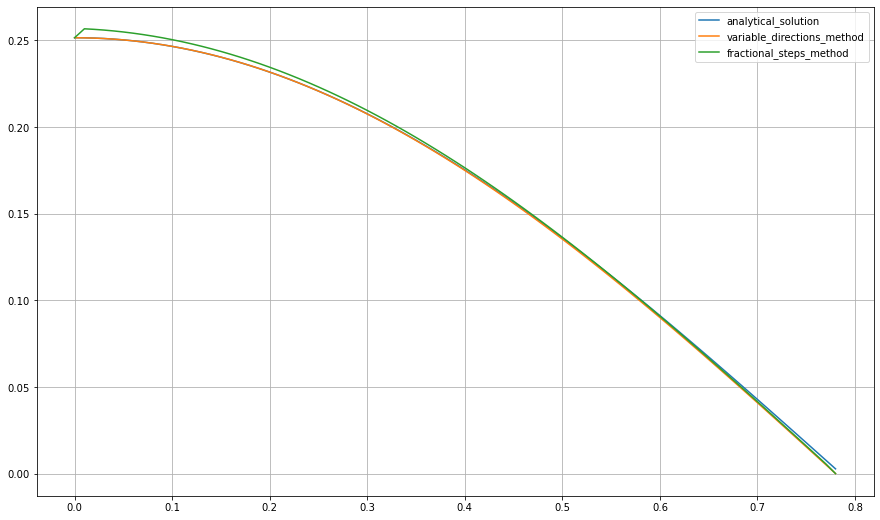

In [7]:
plot_solutions(solutions, 0.5, 0.5, (x_begin, x_end), (y_begin, y_end), (t_begin, t_end), hx, hy, tau)

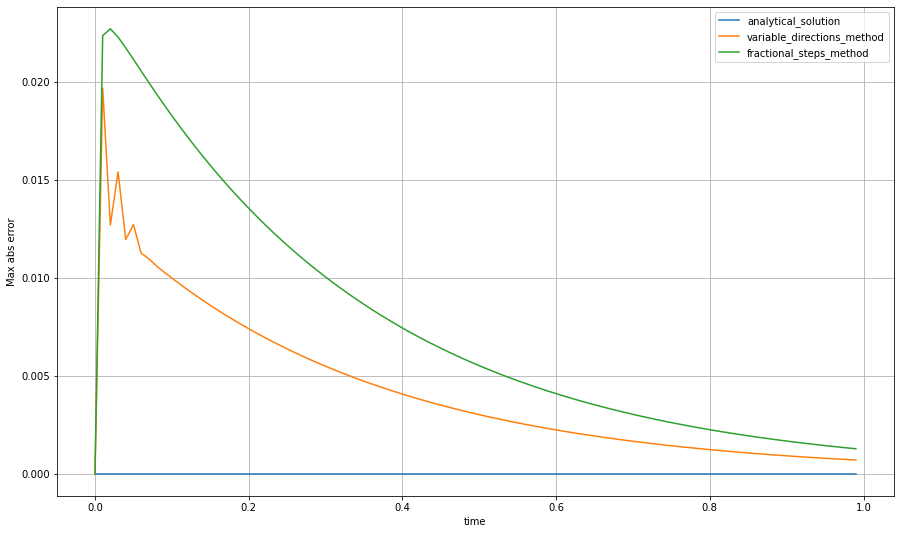

In [8]:
plot_errors(solutions, (t_begin, t_end), tau)